In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("CRM_Dataset.csv")

In [3]:
import sqlite3 

conn = sqlite3.connect(':memory:')

df.to_sql('customer', conn, index=False,if_exists='replace')

5000

In [4]:
print(df.head())

  DonorID FirstName  LastName                         Email  \
0  D00001  Danielle  Anderson            tina69@salazar.com   
1  D00002     Angel      Hart         garciatyler@gmail.com   
2  D00003    Joshua     Stone              ywoods@gmail.com   
3  D00004   Jeffrey     Welch  johnsonkimberly@ferguson.com   
4  D00005      Jill   Vasquez      hughesnicholas@gmail.com   

                Phone               City State  ZipCode LastDonationDate  \
0  (716)033-8417x8760          New Ethan    AK     9539         9/3/2024   
1       (874)907-2648   West Ashleymouth    MS    49618         5/6/2022   
2  105.039.1678x12883     East Stephanie    NJ     6600        1/21/2023   
3    939.859.3082x278  South Andrewshire    SD    22434        1/26/2023   
4        469-539-5369          Moorestad    DC    16142         5/5/2022   

   TotalGifts  TotalAmountDonated EventParticipation  EngagementScore  
0          10             8481.55                Yes               56  
1           5       

In [5]:
print(df.isnull().sum())

DonorID               0
FirstName             0
LastName              0
Email                 0
Phone                 0
City                  0
State                 0
ZipCode               0
LastDonationDate      0
TotalGifts            0
TotalAmountDonated    0
EventParticipation    0
EngagementScore       0
dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DonorID             5000 non-null   object 
 1   FirstName           5000 non-null   object 
 2   LastName            5000 non-null   object 
 3   Email               5000 non-null   object 
 4   Phone               5000 non-null   object 
 5   City                5000 non-null   object 
 6   State               5000 non-null   object 
 7   ZipCode             5000 non-null   int64  
 8   LastDonationDate    5000 non-null   object 
 9   TotalGifts          5000 non-null   int64  
 10  TotalAmountDonated  5000 non-null   float64
 11  EventParticipation  5000 non-null   object 
 12  EngagementScore     5000 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 507.9+ KB
None


In [7]:
print(df.describe())

            ZipCode   TotalGifts  TotalAmountDonated  EngagementScore
count   5000.000000  5000.000000         5000.000000      5000.000000
mean   50231.523400    15.261400        12350.097270        50.899600
std    28624.962295     8.292504         7133.844628        28.996284
min      523.000000     1.000000           21.320000         1.000000
25%    25877.500000     8.000000         6248.907500        26.000000
50%    49843.000000    15.000000        12304.270000        51.000000
75%    74898.000000    22.000000        18440.480000        76.000000
max    99936.000000    29.000000        24991.840000       100.000000


In [8]:
print(df.duplicated().sum())

0


In [9]:
# Convert the date to the datetime

In [10]:
df['LastDonationDate'] = pd.to_datetime(df['LastDonationDate'])

In [11]:
# Convert ZipCodes to String (to preserve Leading zeros)

In [12]:
df['ZipCode'] = df['ZipCode'].astype(str)

In [14]:
print(df['TotalAmountDonated'].describe())

count     5000.000000
mean     12350.097270
std       7133.844628
min         21.320000
25%       6248.907500
50%      12304.270000
75%      18440.480000
max      24991.840000
Name: TotalAmountDonated, dtype: float64


In [15]:
print(df['EngagementScore'].value_counts().sort_index())

EngagementScore
1      46
2      51
3      52
4      50
5      52
       ..
96     60
97     58
98     55
99     44
100    61
Name: count, Length: 100, dtype: int64


In [16]:
# Top Donors

In [17]:
query = ''' 
SELECT FirstName, LastName, TotalAmountDonated
FROM customer
ORDER BY TotalAmountDonated DESC
LIMIT 5
'''

top_donors = pd.read_sql(query,conn)
print(top_donors)

  FirstName LastName  TotalAmountDonated
0    Cheryl    Estes            24991.84
1     Louis  Cochran            24987.64
2   Jessica  Gilbert            24986.53
3   Krystal   Garcia            24980.20
4    Justin    Davis            24972.64


In [18]:
# Engagement vs Donations

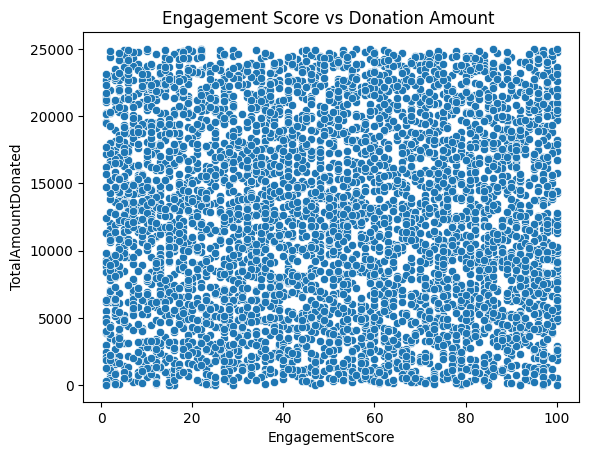

In [19]:
sns.scatterplot(data=df, x='EngagementScore',y='TotalAmountDonated')
plt.title("Engagement Score vs Donation Amount ")
plt.show()

In [20]:
#Average Donation per Gift by Participation Status

In [22]:
query = """
SELECT EventParticipation,
       AVG(TotalAmountDonated / TotalGifts) AS AvgGift
FROM customer
GROUP BY EventParticipation
"""
avg_gift_participation = pd.read_sql(query, conn)
print(avg_gift_participation)

  EventParticipation      AvgGift
0                 No  1510.237944
1                Yes  1731.572543


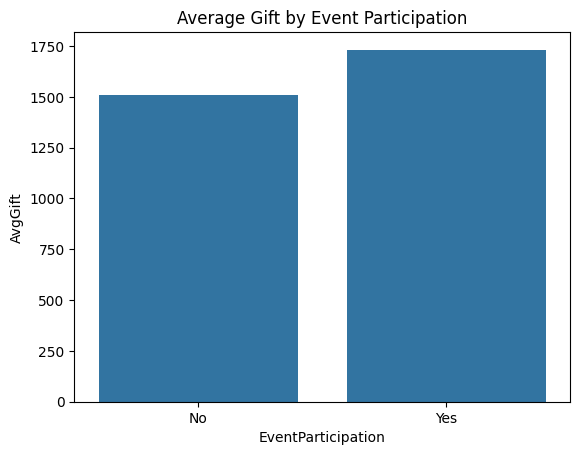

In [23]:
sns.barplot(data=avg_gift_participation, x="EventParticipation", y="AvgGift")
plt.title("Average Gift by Event Participation")
plt.show()


In [24]:
#Donors by State (Count & Total Donations)

In [26]:
query = """
SELECT State,
       COUNT(*) AS NumDonors,
       SUM(TotalAmountDonated) AS TotalDonated
FROM customer
GROUP BY State
ORDER BY TotalDonated DESC
"""
state_summary = pd.read_sql(query, conn)
print(state_summary)

   State  NumDonors  TotalDonated
0     FL        119    1566081.89
1     DE        107    1469640.82
2     UT        110    1438606.22
3     GA        111    1380670.93
4     NJ        116    1380498.98
5     ME        110    1373074.52
6     VT        107    1369026.13
7     TX        110    1360233.25
8     KS         95    1325236.07
9     DC        115    1322885.78
10    MS        111    1298472.45
11    ID        106    1297016.08
12    IA        107    1295408.63
13    MO        104    1286240.23
14    VA        103    1280131.74
15    TN         96    1269971.25
16    LA        106    1269413.79
17    OK         95    1263553.73
18    CA        105    1263138.50
19    SC        109    1263068.21
20    OH         98    1262864.97
21    MN        105    1261689.35
22    AZ         91    1250304.26
23    WY        105    1237956.07
24    WI         94    1233904.29
25    MD         91    1226581.42
26    MT         98    1215210.82
27    IL         86    1212740.00
28    IN      

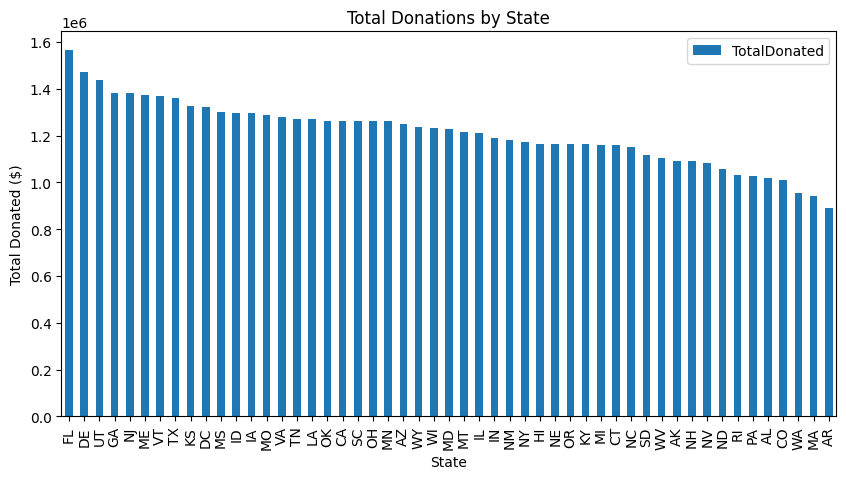

In [27]:
state_summary.plot(kind="bar", x="State", y="TotalDonated", title="Total Donations by State", figsize=(10,5))
plt.ylabel("Total Donated ($)")
plt.show()


In [28]:
#Lapsed Donors (No donation in last 12 months)

In [30]:
from datetime import datetime

today = datetime.strptime("2025-04-21", "%Y-%m-%d")

query = """
SELECT DonorID, FirstName, LastName, LastDonationDate
FROM customer
"""
donation_dates = pd.read_sql(query, conn)
donation_dates["LastDonationDate"] = pd.to_datetime(donation_dates["LastDonationDate"])
donation_dates["DaysSinceLastDonation"] = (today - donation_dates["LastDonationDate"]).dt.days

lapsed_donors = donation_dates[donation_dates["DaysSinceLastDonation"] > 365]
print(lapsed_donors.head())


  DonorID FirstName LastName LastDonationDate  DaysSinceLastDonation
1  D00002     Angel     Hart       2022-05-06                   1081
2  D00003    Joshua    Stone       2023-01-21                    821
3  D00004   Jeffrey    Welch       2023-01-26                    816
4  D00005      Jill  Vasquez       2022-05-05                   1082
5  D00006     Erica    White       2022-11-01                    902


In [31]:
#High-Engagement & High-Value Donors (VIP Segment)

In [33]:
query = """
SELECT FirstName, LastName, TotalAmountDonated, EngagementScore
FROM customer
WHERE EngagementScore > 50 AND TotalAmountDonated > 10000
"""
vip_donors = pd.read_sql(query, conn)
print(vip_donors)

     FirstName LastName  TotalAmountDonated  EngagementScore
0      Jeffrey    Welch            18555.04               92
1        Erica    White            21316.52               83
2      Anthony    Smith            18072.64               62
3        Debra    Marsh            12335.89               93
4         Lisa   Castro            24412.71               65
...        ...      ...                 ...              ...
1468    Dennis   Porter            22791.69               56
1469   Jessica  Johnson            20482.73              100
1470     Sarah   Taylor            17966.67               96
1471    Justin    Gross            22625.14               60
1472     Wanda    Young            23821.04               79

[1473 rows x 4 columns]


In [34]:
#Engagement vs Donation Correlation

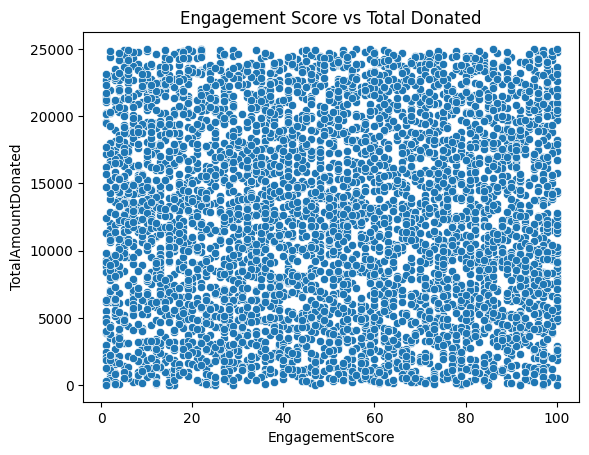

                    EngagementScore  TotalAmountDonated
EngagementScore            1.000000           -0.005283
TotalAmountDonated        -0.005283            1.000000


In [36]:
query = """
SELECT EngagementScore, TotalAmountDonated
FROM customer
"""
engagement_donations = pd.read_sql(query, conn)
sns.scatterplot(data=engagement_donations, x="EngagementScore", y="TotalAmountDonated")
plt.title("Engagement Score vs Total Donated")
plt.show()

correlation = engagement_donations.corr()
print(correlation)


In [37]:
#Average Donations by Engagement Buckets

In [39]:
query = """
SELECT CASE
           WHEN EngagementScore BETWEEN 0 AND 20 THEN 'Low'
           WHEN EngagementScore BETWEEN 21 AND 50 THEN 'Medium'
           ELSE 'High'
       END AS EngagementLevel,
       AVG(TotalAmountDonated) AS AvgDonated
FROM customer
GROUP BY EngagementLevel
"""
engagement_levels = pd.read_sql(query, conn)
print(engagement_levels)


  EngagementLevel    AvgDonated
0            High  12246.667039
1             Low  12461.676657
2          Medium  12450.664009


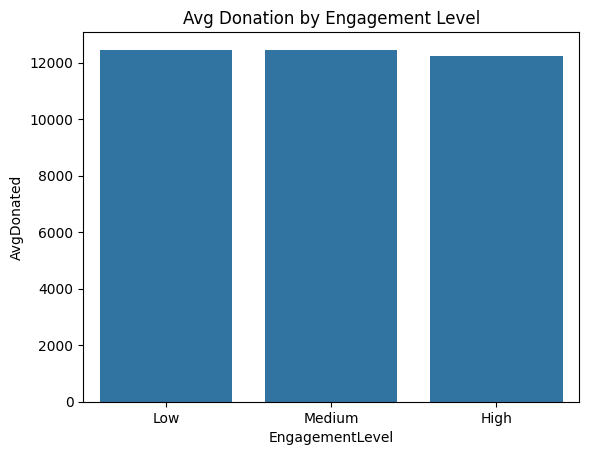

In [40]:
sns.barplot(data=engagement_levels, x="EngagementLevel", y="AvgDonated", order=["Low", "Medium", "High"])
plt.title("Avg Donation by Engagement Level")
plt.show()

In [41]:
#Donation Trends Over Time

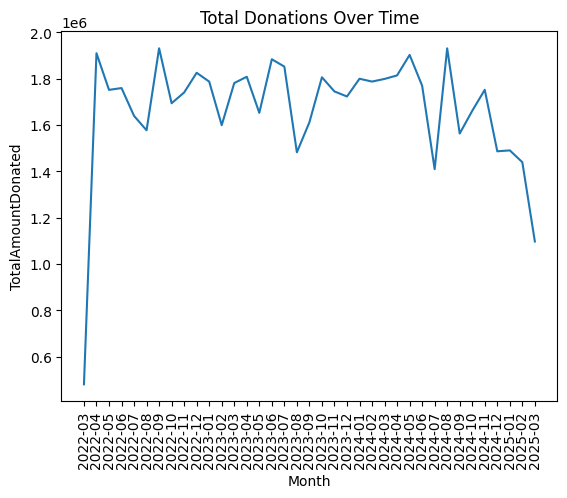

In [43]:
query = """
SELECT LastDonationDate, TotalAmountDonated
FROM customer
"""
donations_time = pd.read_sql(query, conn)
donations_time["LastDonationDate"] = pd.to_datetime(donations_time["LastDonationDate"])
donations_time["Month"] = donations_time["LastDonationDate"].dt.to_period("M")

monthly = donations_time.groupby("Month")["TotalAmountDonated"].sum().reset_index()
monthly["Month"] = monthly["Month"].astype(str)

sns.lineplot(data=monthly, x="Month", y="TotalAmountDonated")
plt.xticks(rotation=90)
plt.title("Total Donations Over Time")
plt.show()


In [44]:
#Create a Simple RFM Score

In [45]:
query = """
SELECT DonorID, FirstName, TotalGifts, TotalAmountDonated, LastDonationDate
FROM customer
"""
rfm_df = pd.read_sql(query, conn)
rfm_df["LastDonationDate"] = pd.to_datetime(rfm_df["LastDonationDate"])
rfm_df["Recency"] = (today - rfm_df["LastDonationDate"]).dt.days
rfm_df["Frequency"] = rfm_df["TotalGifts"]
rfm_df["Monetary"] = rfm_df["TotalAmountDonated"]

rfm_df["R_Score"] = pd.qcut(rfm_df["Recency"], 5, labels=[5,4,3,2,1])
rfm_df["F_Score"] = pd.qcut(rfm_df["Frequency"], 5, labels=[1,2,3,4,5])
rfm_df["M_Score"] = pd.qcut(rfm_df["Monetary"], 5, labels=[1,2,3,4,5])
rfm_df["RFM"] = rfm_df["R_Score"].astype(str) + rfm_df["F_Score"].astype(str) + rfm_df["M_Score"].astype(str)

print(rfm_df[["DonorID", "RFM"]].head())


  DonorID  RFM
0  D00001  522
1  D00002  113
2  D00003  242
3  D00004  244
4  D00005  121


In [46]:
#Gift Frequency Distribution (Who donates how often?)

In [48]:
query = ''' 
SELECT TotalGifts, COUNT(*) AS DonorCount
FROM customer
GROUP BY TotalGifts
ORDER BY TotalGifts
'''
gift_freq = pd.read_sql(query, conn) 
print(gift_freq)

    TotalGifts  DonorCount
0            1         146
1            2         171
2            3         171
3            4         162
4            5         163
5            6         172
6            7         172
7            8         162
8            9         143
9           10         181
10          11         156
11          12         180
12          13         197
13          14         158
14          15         170
15          16         189
16          17         181
17          18         185
18          19         160
19          20         175
20          21         167
21          22         192
22          23         203
23          24         163
24          25         180
25          26         200
26          27         171
27          28         155
28          29         175


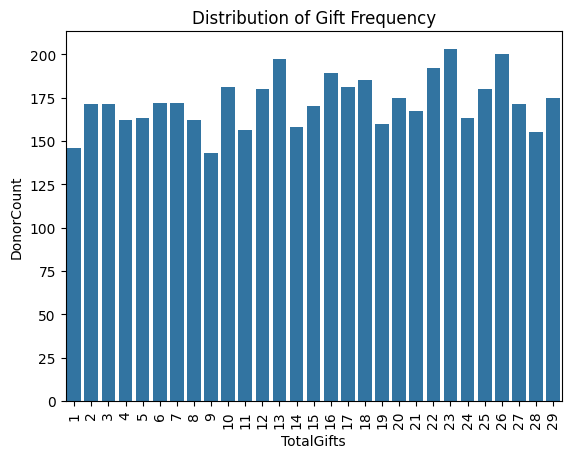

In [50]:
sns.barplot(data=gift_freq, x="TotalGifts", y="DonorCount")
plt.title("Distribution of Gift Frequency")
plt.xticks(rotation=90)
plt.show()

In [51]:
#Email Domain Analysis (Which domains dominate?)

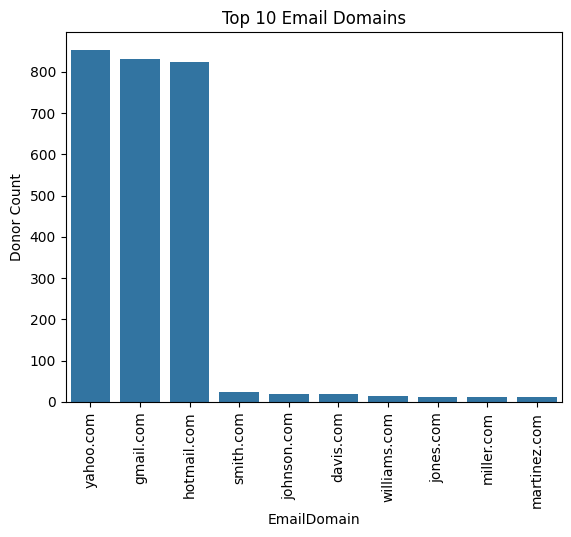

In [53]:
df['EmailDomain'] = df['Email'].str.extract(r'@(.+)$')
email_counts = df['EmailDomain'].value_counts().head(10)

sns.barplot(x=email_counts.index, y=email_counts.values)
plt.title("Top 10 Email Domains")
plt.xticks(rotation=90)
plt.ylabel("Donor Count")
plt.show()


In [54]:
#Geographic Heatmap (Donors by ZIP or State)

In [55]:
query = ''' 
SELECT State, COUNT(*) AS DonorCount
FROM customer
GROUP BY State
'''
state_donors = pd.read_sql(query,conn)
print(state_donors)

   State  DonorCount
0     AK          90
1     AL          86
2     AR          82
3     AZ          91
4     CA         105
5     CO          86
6     CT          94
7     DC         115
8     DE         107
9     FL         119
10    GA         111
11    HI         101
12    IA         107
13    ID         106
14    IL          86
15    IN         100
16    KS          95
17    KY          98
18    LA         106
19    MA          88
20    MD          91
21    ME         110
22    MI          91
23    MN         105
24    MO         104
25    MS         111
26    MT          98
27    NC          90
28    ND          94
29    NE          92
30    NH          83
31    NJ         116
32    NM          95
33    NV          88
34    NY          98
35    OH          98
36    OK          95
37    OR          95
38    PA          83
39    RI          94
40    SC         109
41    SD          88
42    TN          96
43    TX         110
44    UT         110
45    VA         103
46    VT     

In [58]:
#Donation Recency Distribution (How "cold" are the donors?)

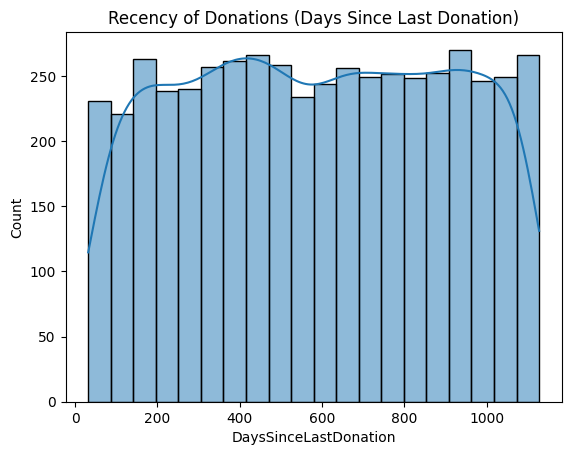

In [59]:
df["LastDonationDate"] = pd.to_datetime(df["LastDonationDate"])
df["DaysSinceLastDonation"] = (pd.to_datetime("2025-04-21") - df["LastDonationDate"]).dt.days

sns.histplot(df["DaysSinceLastDonation"], bins=20, kde=True)
plt.title("Recency of Donations (Days Since Last Donation)")
plt.show()


In [60]:
#Donor Retention vs. Churn

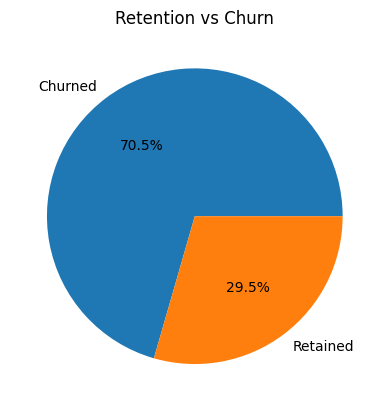

In [61]:
df["RetentionStatus"] = df["DaysSinceLastDonation"].apply(lambda x: "Retained" if x <= 365 else "Churned")
df["RetentionStatus"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Retention vs Churn")
plt.ylabel("")
plt.show()


In [62]:
#Lifetime Value Estimation (LTV)

In [63]:
df["LTV"] = df["TotalAmountDonated"]
print(df[["DonorID", "LTV"]].sort_values(by="LTV", ascending=False).head())


     DonorID       LTV
4857  D04858  24991.84
3835  D03836  24987.64
31    D00032  24986.53
666   D00667  24980.20
1363  D01364  24972.64


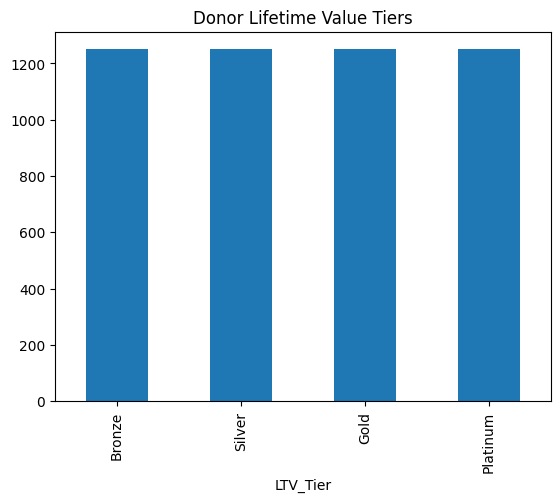

In [64]:
df["LTV_Tier"] = pd.qcut(df["LTV"], 4, labels=["Bronze", "Silver", "Gold", "Platinum"])
df["LTV_Tier"].value_counts().plot(kind="bar")
plt.title("Donor Lifetime Value Tiers")
plt.show()


In [67]:
#Clustering-Based Donor Personas (KMeans)

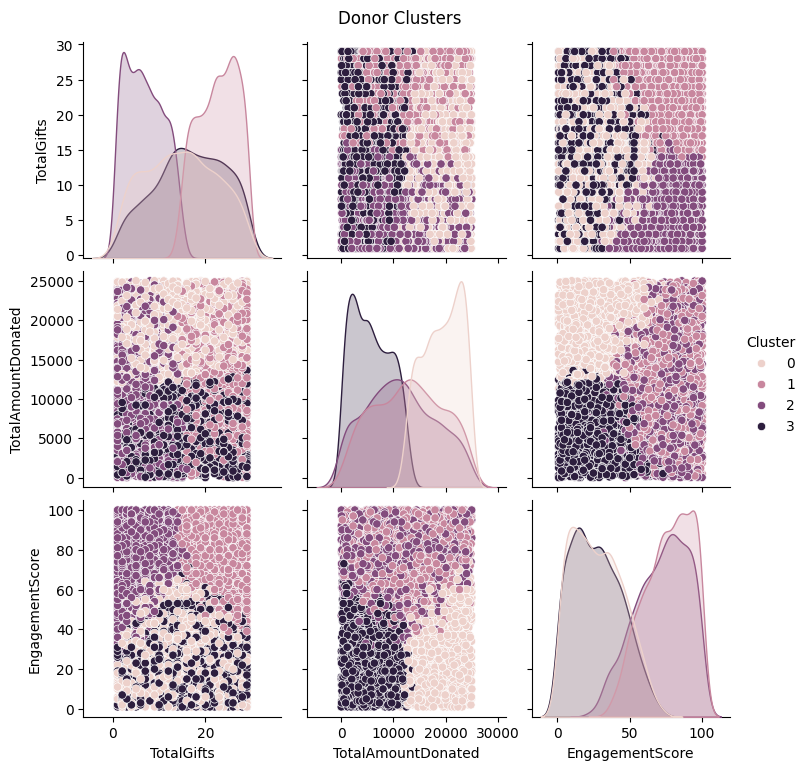

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["TotalGifts", "TotalAmountDonated", "EngagementScore"]]
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, hue="Cluster", vars=["TotalGifts", "TotalAmountDonated", "EngagementScore"])
plt.suptitle("Donor Clusters", y=1.02)
plt.show()


In [69]:
#Engagement Distribution by Cluster or State

In [71]:
query = """
SELECT State, AVG(EngagementScore) AS AvgEngagement
FROM customer
GROUP BY State
ORDER BY AvgEngagement DESC
"""
engagement_by_state = pd.read_sql(query, conn)
print(engagement_by_state)

   State  AvgEngagement
0     WV      56.234694
1     AR      55.560976
2     IN      55.320000
3     CO      54.779070
4     OH      54.510204
5     DE      54.476636
6     ME      53.981818
7     OR      53.863158
8     IA      53.850467
9     TX      53.454545
10    KS      53.073684
11    HI      53.029703
12    SC      52.944954
13    ND      52.638298
14    CT      52.531915
15    KY      52.520408
16    WY      51.980952
17    IL      51.848837
18    NY      51.806122
19    LA      51.688679
20    AK      51.511111
21    PA      51.385542
22    NV      51.272727
23    WI      51.265957
24    VA      51.116505
25    TN      51.083333
26    NJ      50.956897
27    NM      50.915789
28    OK      50.894737
29    MS      50.873874
30    MT      50.826531
31    NC      50.811111
32    NH      50.421687
33    SD      50.340909
34    ID      50.122642
35    MI      49.780220
36    MN      49.695238
37    AZ      49.593407
38    FL      49.361345
39    CA      48.990476
40    UT      48

In [72]:
#Donation Seasonality (Do people give more in certain months?)

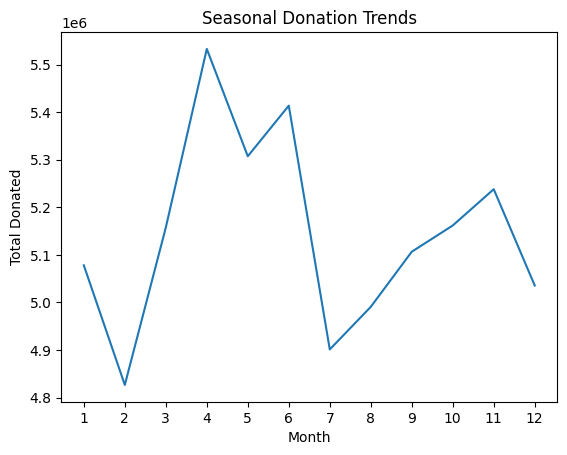

In [73]:
df["DonationMonth"] = df["LastDonationDate"].dt.month
monthly_gifts = df.groupby("DonationMonth")["TotalAmountDonated"].sum()

sns.lineplot(x=monthly_gifts.index, y=monthly_gifts.values)
plt.xticks(range(1,13))
plt.title("Seasonal Donation Trends")
plt.xlabel("Month")
plt.ylabel("Total Donated")
plt.show()
